In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling

sns.set(context='notebook', style='ticks')

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr_frozen_09272019.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
lsl_dr.shape

(65064, 246)

Exclusions

In [4]:
other_etiology = (lsl_dr[['etiology_3___2', 'etiology_3___4', 'etiology_3___5', 'etiology_3___6', 'etiology_3___9',
       'etiology_oth___1', 'etiology_oth___3', 'etiology_oth___4', 'etiology_oth___8', 'etiology_oth___9']]
                      .sum(1).astype(bool))

In [5]:
inclusion_mask = (~lsl_dr.non_english.astype(bool) 
                  & (lsl_dr.hl==0)
                  & ((lsl_dr.autism==1)))

In [6]:
autism_subset = lsl_dr[inclusion_mask]
autism_subset.drop_duplicates(subset='study_id').shape

(36, 246)

## Demographics

In [7]:
autism_subset.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      116
Female     41
Name: male, dtype: int64

In [8]:
autism_subset.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       88
Other       38
Black       14
Hispanic     9
Asian        8
Name: race, dtype: int64

In [9]:
(autism_subset.premature_age.replace({9:None})==8).replace({True: '>=36 weeks', False: '<36 weeks', 
                                                            np.nan: 'Unknown'}).value_counts()

>=36 weeks    121
<36 weeks      36
Name: premature_age, dtype: int64

In [10]:
autism_subset.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1          46
2          63
3          19
4+         10
Missing    19
Name: sib, dtype: int64

In [11]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

autism_subset.mother_ed.replace(ed_lookup).value_counts()

High school diploma/GED    66
Unknown                    40
Some college               30
Some high school           21
Name: mother_ed, dtype: int64

In [12]:
autism_subset.father_ed.replace(ed_lookup).value_counts()

Unknown                    52
Bachelor's degree          44
Post graduate degree       37
High school diploma/GED    13
Some college               11
Name: father_ed, dtype: int64

In [13]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

autism_subset.family_inv.replace(family_lookup).value_counts()

Average Participation    60
Ideal Participation      52
Missing                  20
Good Participation       17
Below Average             8
Name: family_inv, dtype: int64

In [14]:
autism_subset[["age_diag", "age_amp", "age_int", "age"]].describe()

,age_diag,age_amp,age_int,age
count,146.000000,142.000000,127.000000,157.000000
mean,15.767123,20.204225,20.055118,33.000000
std,18.262092,18.261512,17.763127,20.496716
min,0.000000,1.000000,1.000000,1.000000
25%,1.000000,3.250000,5.000000,19.000000
50%,10.000000,19.000000,20.000000,33.000000
75%,21.000000,27.000000,25.000000,46.000000
max,83.000000,83.000000,83.000000,83.000000


In [15]:
autism_subset.otherserv.replace({0: "OPTION + outside", 1: "OPTION only", 2: "Missing"}).value_counts()

OPTION + outside    112
OPTION only          31
Name: otherserv, dtype: int64

## Hearing loss

In [16]:
autism_subset.degree_hl_ad.isnull().sum()

11

In [17]:
autism_subset.degree_hl_as.isnull().sum()

11

In [18]:
autism_subset.degree_hl_ad.value_counts()

6.0    84
3.0    23
4.0    13
5.0    13
1.0     8
2.0     5
Name: degree_hl_ad, dtype: int64

In [19]:
autism_subset.degree_hl_as.value_counts()

6.0    72
3.0    22
5.0    18
2.0    16
0.0     9
4.0     7
1.0     2
Name: degree_hl_as, dtype: int64

In [20]:
hl_data = autism_subset.set_index('study_id')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [21]:
autism_subset.one_or_both_parent_hl.value_counts()

0.0    128
1.0     12
Name: one_or_both_parent_hl, dtype: int64

In [22]:
autism_subset.one_or_both_parent_hl.isnull().sum()

17

Individuals with no hearing loss type

In [23]:
hl_data[hl_data.sum(1)==0].index.values

array(['0416-2012-8486', '0416-2012-8486', '0416-2012-8486',
       '0416-2012-8486', '0416-2012-8486', '0416-2012-8486',
       '0735-2011-0006', '0735-2011-0006', '0735-2011-0006',
       '0735-2011-0006', '0735-2011-0006'], dtype=object)

In [24]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      133
unilateral_snhl       6
unilateral_mixed      3
assymetrical          2
bilateral_mixed       2
unilateral_unk        0
unilateral_cond       0
unilateral_ansd       0
bilateral_unk         0
bilateral_normal      0
bilateral_cond        0
bilateral_ansd        0
dtype: int64

In [25]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.85
unilateral_snhl     0.04
unilateral_mixed    0.02
assymetrical        0.01
bilateral_mixed     0.01
unilateral_unk      0.00
unilateral_cond     0.00
unilateral_ansd     0.00
bilateral_unk       0.00
bilateral_normal    0.00
bilateral_cond      0.00
bilateral_ansd      0.00
dtype: float64

In [26]:
tech_data = autism_subset.set_index('study_id')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [27]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        111
bilateral_ha         20
unilateral_ci        14
bimodal              10
unilateral_other      0
unilateral_ha         0
bilateral_other       0
dtype: int64

In [28]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.71
bilateral_ha        0.13
unilateral_ci       0.09
bimodal             0.06
unilateral_other    0.00
unilateral_ha       0.00
bilateral_other     0.00
dtype: float64

Individuals with no technology type

In [29]:
tech_data[tech_data.sum(1)==0].index.values

array(['0735-2019-0020', '0735-2019-0020'], dtype=object)

## Hearing Loss

In [30]:
autism_subset.columns[autism_subset.columns.str.contains('_hl_')]

Index(['degree_hl_ad', 'type_hl_ad', 'degree_hl_as', 'type_hl_as',
       'bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound'],
      dtype='object')

In [31]:
hl_data = autism_subset.set_index('study_id')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [32]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_profound     69
bilateral_hl_moderate     14
bilateral_hl_severe       13
unilateral_hl_modsev       9
bilateral_hl_mild          3
bilateral_hl_slight        2
unilateral_hl_profound     0
unilateral_hl_severe       0
unilateral_hl_moderate     0
unilateral_hl_mild         0
unilateral_hl_slight       0
bilateral_hl_modsev        0
bilateral_hl_normal        0
dtype: int64

In [33]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_profound     0.44
bilateral_hl_moderate     0.09
bilateral_hl_severe       0.08
unilateral_hl_modsev      0.06
bilateral_hl_mild         0.02
bilateral_hl_slight       0.01
unilateral_hl_profound    0.00
unilateral_hl_severe      0.00
unilateral_hl_moderate    0.00
unilateral_hl_mild        0.00
unilateral_hl_slight      0.00
bilateral_hl_modsev       0.00
bilateral_hl_normal       0.00
dtype: float64

Missing one or both hearing loss values (left/right)

In [34]:
(autism_subset[['degree_hl_ad', 'degree_hl_as']].isnull().sum(1) > 0).sum()

11

## Summary of scores by domain

In [35]:
test_scores = lsl_dr[inclusion_mask].copy()

In [36]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [37]:
test_scores.groupby('domain').score.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,9.0,78.1,17.4,49.0,70.0,78.0,85.0,102.0
Expressive Language,34.0,70.3,20.2,42.0,56.2,64.5,82.8,115.0
Expressive Vocabulary,23.0,77.3,24.7,20.0,66.5,78.0,94.0,124.0
Language,33.0,67.8,21.9,42.0,53.0,59.0,73.0,129.0
Receptive Language,33.0,68.5,20.2,46.0,54.0,65.0,74.0,140.0
Receptive Vocabulary,25.0,78.2,25.6,34.0,63.0,71.0,87.0,141.0


In [38]:
test_scores.domain.unique()

array(['Expressive Vocabulary', 'Receptive Vocabulary',
       'Receptive Language', 'Expressive Language', 'Language',
       'Articulation'], dtype=object)

In [39]:
test_scores['domain_labels'] = test_scores.domain.replace({'Expressive Vocabulary': 'Expressive\nVocabulary', 
                                                           'Receptive Vocabulary': 'Receptive\nVocabulary',
                                                           'Receptive Language': 'Receptive\nLanguage', 
                                                           'Expressive Language': 'Expressive\nLanguage', 
                                                           'Language': 'Total\nLanguage'})

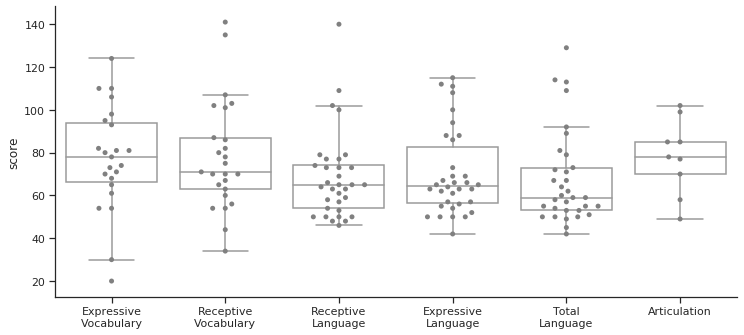

In [40]:
sns.catplot("domain_labels", y="score", data=test_scores, kind="box", color='white', fliersize=0)
sns.swarmplot("domain_labels", y="score", data=test_scores, color='grey')
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

## Domain-specific summaries

Age of amplification greater than 6mo.

In [41]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_amp_greater_6                                      
Articulation          False                3.0  72.666667  25.106440  49.0   
                      True                 6.0  80.833333  14.330620  58.0   
Expressive Language   False               14.0  76.357143  23.404822  42.0   
                      True                20.0  66.100000  16.945423  50.0   
Expressive Vocabulary False                8.0  80.375000  28.289006  30.0   
                      True                15.0  75.666667  23.457154  20.0   
Language              False               14.0  73.071429  27.215562  42.0   
                      True                19.0  63.894737  16.785889  45.0   
Receptive Language    False               14.0  73.214286  26.902040  48.0   
                      True                19.0  65.000000  13.017083  46.0   
Receptive Vocabulary  False                9.0  84.777778  33.822248  44.0   
                      True                16.0  74.500000  20.016660  34.0   

                                           25%   50%     75%    max  
domain                age_amp_greater_6                              
Articulation          False              59.50  70.0   84.50   99.0  
                      True               77.25  81.5   85.00  102.0  
Expressive Language   False              62.25  66.5   96.50  115.0  
                      True               54.25  63.0   69.00  112.0  
Expressive Vocabulary False              71.75  79.5   88.25  124.0  
                      True               64.50  73.0   94.00  110.0  
Language              False              54.25  61.5   86.50  129.0  
                      True               52.00  59.0   69.00  113.0  
Receptive Language    False              52.00  65.5   77.75  140.0  
                      True               55.50  64.0   73.00  100.0  
Receptive Vocabulary  False              63.00  71.0  101.00  141.0  
                      True               62.75  72.5   86.25  107.0

Age of enrollment greater than 6mo.

In [42]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_enroll_greater_6                                      
Articulation          False                   3.0  82.333333  14.977761  70.0   
                      True                    6.0  76.000000  19.452506  49.0   
Expressive Language   False                  14.0  72.214286  23.603059  42.0   
                      True                   20.0  69.000000  17.941425  50.0   
Expressive Vocabulary False                  10.0  79.800000  27.887871  30.0   
                      True                   13.0  75.384615  22.933013  20.0   
Language              False                  14.0  70.357143  27.399066  42.0   
                      True                   19.0  65.894737  17.416132  45.0   
Receptive Language    False                  14.0  72.071429  27.260747  48.0   
                      True                   19.0  65.842105  12.971178  46.0   
Receptive Vocabulary  False                  11.0  85.454545  31.398610  44.0   
                      True                   14.0  72.500000  19.369881  34.0   

                                              25%   50%     75%    max  
domain                age_enroll_greater_6                              
Articulation          False                 74.00  78.0   88.50   99.0  
                      True                  62.75  81.0   85.00  102.0  
Expressive Language   False                 55.50  64.5   82.75  115.0  
                      True                  56.75  64.5   73.75  112.0  
Expressive Vocabulary False                 67.00  77.5   99.75  124.0  
                      True                  68.00  78.0   93.00  110.0  
Language              False                 53.25  57.0   77.25  129.0  
                      True                  54.00  60.0   72.00  113.0  
Receptive Language    False                 50.75  65.5   73.75  140.0  
                      True                  58.00  64.0   75.00  100.0  
Receptive Vocabulary  False                 66.50  71.0  104.00  141.0  
                      True                  58.25  72.5   85.00  103.0

(Non-)Profound hearing loss

In [43]:
(test_scores.assign(profound_hl=test_scores.degree_hl==6)
         .groupby(['domain', 'profound_hl'])
         .score.describe())

count       mean        std   min    25%  \
domain                profound_hl                                             
Articulation          False          6.0  80.666667  16.966634  58.0  71.75   
                      True           3.0  73.000000  20.784610  49.0  67.00   
Expressive Language   False         15.0  68.600000  18.306127  50.0  55.50   
                      True          19.0  71.684211  21.949570  42.0  59.00   
Expressive Vocabulary False         10.0  77.500000  23.815261  30.0  70.75   
                      True          13.0  77.153846  26.324406  20.0  65.00   
Language              False         14.0  65.142857  18.291895  49.0  54.25   
                      True          19.0  69.736842  24.562487  42.0  53.00   
Receptive Language    False         14.0  66.214286  12.491096  48.0  59.25   
                      True          19.0  70.157895  24.549866  46.0  50.00   
Receptive Vocabulary  False         11.0  75.272727  20.703096  44.0  61.50   
                      True          14.0  80.500000  29.502933  34.0  65.50   

                                    50%    75%    max  
domain                profound_hl                      
Articulation          False        77.5  93.75  102.0  
                      True         85.0  85.00   85.0  
Expressive Language   False        63.0  77.50  112.0  
                      True         65.0  79.50  115.0  
Expressive Vocabulary False        77.5  91.75  110.0  
                      True         78.0  93.00  124.0  
Language              False        58.5  66.25  113.0  
                      True         60.0  76.00  129.0  
Receptive Language    False        65.0  71.25  100.0  
                      True         63.0  78.00  140.0  
Receptive Vocabulary  False        70.0  90.00  107.0  
                      True         75.5  86.75  141.0

Parent with(out) hearing loss

In [44]:
test_scores.loc[test_scores.parent_hearing_loss=='Unknown', 'parent_hearing_loss'] = np.nan
(test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss']))
         .groupby(['domain', 'parent_with_hl'])
         .score.describe())

count       mean        std   min  \
domain                parent_with_hl                                      
Articulation          False             7.0  74.142857  17.449246  49.0   
                      True              2.0  92.000000   9.899495  85.0   
Expressive Language   False            32.0  70.781250  20.734472  42.0   
                      True              2.0  63.000000   1.414214  62.0   
Expressive Vocabulary False            21.0  77.904762  25.625973  20.0   
                      True              2.0  71.000000  14.142136  61.0   
Language              False            31.0  68.451613  22.466032  42.0   
                      True              2.0  57.500000   3.535534  55.0   
Receptive Language    False            31.0  68.806452  20.766029  46.0   
                      True              2.0  63.500000   3.535534  61.0   
Receptive Vocabulary  False            23.0  79.260870  26.249186  34.0   
                      True              2.0  66.000000  16.970563  54.0   

                                        25%   50%    75%    max  
domain                parent_with_hl                             
Articulation          False           64.00  77.0  81.50  102.0  
                      True            88.50  92.0  95.50   99.0  
Expressive Language   False           55.75  65.0  86.50  115.0  
                      True            62.50  63.0  63.50   64.0  
Expressive Vocabulary False           68.00  78.0  95.00  124.0  
                      True            66.00  71.0  76.00   81.0  
Language              False           53.00  59.0  76.00  129.0  
                      True            56.25  57.5  58.75   60.0  
Receptive Language    False           53.50  65.0  75.50  140.0  
                      True            62.25  63.5  64.75   66.0  
Receptive Vocabulary  False           64.00  71.0  94.00  141.0  
                      True            60.00  66.0  72.00   78.0

Mother with(out) college education

In [45]:
test_scores.groupby(['domain', 'mother_college']).score.describe()

count       mean        std   min  \
domain                mother_college                                      
Articulation          0.0               5.0  84.400000  17.756689  58.0   
                      1.0               3.0  77.333333   7.505553  70.0   
Expressive Language   0.0              18.0  67.444444  16.981728  42.0   
                      1.0               6.0  84.666667  22.535897  64.0   
Expressive Vocabulary 0.0              14.0  77.285714  22.781330  20.0   
                      1.0               4.0  85.000000  21.771541  61.0   
Language              0.0              17.0  65.235294  16.972512  42.0   
                      1.0               6.0  81.166667  26.528601  55.0   
Receptive Language    0.0              17.0  66.529412  13.919939  46.0   
                      1.0               6.0  77.000000  23.160311  50.0   
Receptive Vocabulary  0.0              16.0  74.812500  17.174472  34.0   
                      1.0               5.0  90.800000  33.655609  54.0   

                                        25%    50%     75%    max  
domain                mother_college                               
Articulation          0.0             78.00   85.0   99.00  102.0  
                      1.0             73.50   77.0   81.00   85.0  
Expressive Language   0.0             56.25   64.0   72.00  108.0  
                      1.0             66.25   77.5  105.25  112.0  
Expressive Vocabulary 0.0             68.75   80.5   90.25  110.0  
                      1.0             70.75   84.5   98.75  110.0  
Language              0.0             55.00   62.0   72.00  109.0  
                      1.0             61.00   72.5  105.00  114.0  
Receptive Language    0.0             59.00   66.0   73.00  102.0  
                      1.0             62.00   71.0   94.25  109.0  
Receptive Vocabulary  0.0             69.25   73.0   83.00  107.0  
                      1.0             60.00  102.0  103.00  135.0